In [1]:
import sys
sys.path.append('../')
from src import optimizer as _optimizer
from src import visualization as _visualization
from src import metrics as _metrics
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
import seaborn as sns
sns.set(rc={'figure.figsize':(20,8)})
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
pd.set_option('display.max_rows', 120)

## Reading / Displaying the Data 

In [2]:
df_products = pd.read_csv('../data/products_features_exp3.csv')

In [3]:
df_products = df_products.set_index('code')

In [4]:
df_products.head()

,cat_code,source_channel_quantity_152bf0ce464047b9499ccb9e5b9b77a8,source_channel_quantity_2934a86a91bfa55d7f20b4f08a441fac,source_channel_quantity_3ab2427543039f8c9f17d06f6f65a3a7,source_channel_quantity_5a97b8efd901c1d28ff86522b95babb9,source_channel_quantity_67c19e107de33cab7ea9a9db8bc9ccd2,source_channel_quantity_7261d300057219056592010c7bdaf5ee,source_channel_quantity_98defd6ee70dfb1dea416cecdf391f58,source_channel_quantity_9d3e0fcbc1f16d80a76026e8f1c26002,source_channel_quantity_a578e71c3216f513a84ec6a46084fd3a,...,unit_liquid_cost_perc_max,unit_liquid_cost_perc_min,unit_liquid_cost_perc_percentile_50,unit_markup_std,unit_markup_max,unit_markup_min,unit_markup_percentile_50,perc_icms_quantity__0_1,perc_icms_quantity__1_12,perc_icms_quantity__12_20
code,,,,,,,,,,,,,,,,,,,,,
e6762ba2ffbca07ab6cee7551caeaad5,1,0.048780,0.0,0.0,0.000000,0.0,0.02439,0.048780,0.146341,0.146341,...,0.873420,0.495834,0.713632,0.339841,2.016804,1.144924,1.401282,0.439024,0.0,0.512195
d408e1b5e841dde4e15a4cfa182e3812,5,0.013333,0.0,0.0,0.026667,0.0,0.00000,0.040000,0.040000,0.080000,...,0.904901,0.198069,0.739112,0.275338,1.999516,1.105093,1.334629,0.226667,0.0,0.546667
29424aaf6e27a8dbe4b7273a0a39131d,5,0.034091,0.0,0.0,0.000000,0.0,0.00000,0.017045,0.051136,0.210227,...,0.741435,0.209398,0.573237,0.389380,2.791206,1.294306,1.574516,0.198864,0.0,0.795455
723f73c85e91fc31d147dfade389d4f9,0,0.034000,0.0,0.0,0.002000,0.0,0.03400,0.044000,0.078000,0.116000,...,1.014705,0.353106,0.768454,0.099146,1.637204,0.985509,1.301313,0.082000,0.9,0.018000
54209126056016c7c391c0c8fd8e6eff,0,0.013746,0.0,0.0,0.000000,0.0,0.00000,0.024055,0.079038,0.096220,...,0.897872,0.263493,0.544282,0.313052,2.351887,1.113744,1.798905,0.494845,0.0,0.460481


## Dimensionality Reduction
On exp 1 the number of centroids was of almost the number of samples, so we have to reduce the dimensionality of the dataset.

In [5]:
corr_matrix = df_products.corr()

In [6]:
corr_matrix.head()

,cat_code,source_channel_quantity_152bf0ce464047b9499ccb9e5b9b77a8,source_channel_quantity_2934a86a91bfa55d7f20b4f08a441fac,source_channel_quantity_3ab2427543039f8c9f17d06f6f65a3a7,source_channel_quantity_5a97b8efd901c1d28ff86522b95babb9,source_channel_quantity_67c19e107de33cab7ea9a9db8bc9ccd2,source_channel_quantity_7261d300057219056592010c7bdaf5ee,source_channel_quantity_98defd6ee70dfb1dea416cecdf391f58,source_channel_quantity_9d3e0fcbc1f16d80a76026e8f1c26002,source_channel_quantity_a578e71c3216f513a84ec6a46084fd3a,...,unit_liquid_cost_perc_max,unit_liquid_cost_perc_min,unit_liquid_cost_perc_percentile_50,unit_markup_std,unit_markup_max,unit_markup_min,unit_markup_percentile_50,perc_icms_quantity__0_1,perc_icms_quantity__1_12,perc_icms_quantity__12_20
cat_code,1.000000,-0.145934,-0.053941,0.012216,0.184604,0.319875,-0.006926,-0.076344,-0.190358,0.085658,...,-0.150774,0.296342,0.034913,0.012797,0.044825,0.237868,0.013608,-0.445508,0.107789,0.251430
source_channel_quantity_152bf0ce464047b9499ccb9e5b9b77a8,-0.145934,1.000000,0.033150,0.430045,0.257194,-0.040990,0.006779,-0.031943,0.342845,0.159802,...,0.050131,-0.106705,0.096977,-0.097783,-0.071968,-0.097434,-0.126014,0.064901,0.007256,-0.076963
source_channel_quantity_2934a86a91bfa55d7f20b4f08a441fac,-0.053941,0.033150,1.000000,0.114107,0.011493,-0.018215,-0.027578,0.042141,0.129401,-0.050564,...,0.112438,-0.058965,0.005937,-0.060909,-0.019434,-0.093180,0.005121,0.164410,-0.018029,-0.143211
source_channel_quantity_3ab2427543039f8c9f17d06f6f65a3a7,0.012216,0.430045,0.114107,1.000000,0.439110,-0.029670,0.028259,0.225287,0.298838,-0.101909,...,0.433664,-0.315890,0.217208,-0.016774,0.064952,-0.295974,-0.142681,0.075811,-0.058772,-0.129712
source_channel_quantity_5a97b8efd901c1d28ff86522b95babb9,0.184604,0.257194,0.011493,0.439110,1.000000,-0.025863,0.008701,0.247089,0.429128,-0.144393,...,0.253668,-0.044314,0.197928,-0.088761,-0.063936,-0.223675,-0.195560,0.040848,-0.043538,-0.099611


In [7]:
for c1 in corr_matrix.columns: 
    for c2 in corr_matrix.columns: 
        if corr_matrix.loc[c1,c2] >= 0.6 and c1 != c2: 
            print (c1, c2)

source_channel_quantity_7261d300057219056592010c7bdaf5ee month_quantity_8
month_quantity_6 month_quantity_8
month_quantity_8 source_channel_quantity_7261d300057219056592010c7bdaf5ee
month_quantity_8 month_quantity_6
unit_liquid_cost_perc_std unit_liquid_cost_perc_max
unit_liquid_cost_perc_max unit_liquid_cost_perc_std
unit_liquid_cost_perc_max unit_liquid_cost_perc_percentile_50
unit_liquid_cost_perc_percentile_50 unit_liquid_cost_perc_max
unit_markup_std unit_markup_max
unit_markup_max unit_markup_std
unit_markup_min unit_markup_percentile_50
unit_markup_percentile_50 unit_markup_min


since there is a high correlation between the weeknumbers and the month

In [8]:
## import numpy as np
from scipy.stats import entropy
from math import log, e
import pandas as pd   

""" Usage: pandas_entropy(df['column1']) """

def column_entropy(column, base=None):
    vc = pd.Series(column).value_counts(normalize=True, sort=False)
    base = e if base is None else base
    return -(vc * np.log(vc)/np.log(base)).sum()
## https://stackoverflow.com/questions/49685591/how-to-find-the-entropy-of-each-column-of-data-set-by-python

In [9]:
c_to_drop = []
for c in df_products.columns: 
    col_entropy = column_entropy(df_products[c])
    if col_entropy > 4.8: 
        c_to_drop.append(c)
    print(c, col_entropy)
print(c_to_drop)

cat_code 0.8543757341118429
source_channel_quantity_152bf0ce464047b9499ccb9e5b9b77a8 4.526292761564533
source_channel_quantity_2934a86a91bfa55d7f20b4f08a441fac 0.3591454700136032
source_channel_quantity_3ab2427543039f8c9f17d06f6f65a3a7 2.004545134279902
source_channel_quantity_5a97b8efd901c1d28ff86522b95babb9 2.5394554406868632
source_channel_quantity_67c19e107de33cab7ea9a9db8bc9ccd2 0.8902049101696919
source_channel_quantity_7261d300057219056592010c7bdaf5ee 4.105704654834601
source_channel_quantity_98defd6ee70dfb1dea416cecdf391f58 4.600375711931584
source_channel_quantity_9d3e0fcbc1f16d80a76026e8f1c26002 4.728905014343594
source_channel_quantity_a578e71c3216f513a84ec6a46084fd3a 4.831518056400781
source_channel_quantity_af082bb0c2fa1414655017d464aa0262 4.16168688042207
source_channel_quantity_b76eb9b8fc0f17098812da9117d3e500 4.8248792393442015
source_channel_quantity_e9b49f9086ba813ca3f0b321710fef16 0.09015080598088239
source_channel_quantity_ea2912716be1999ab62d5b9dfa4f58f9 4.61683084

In [10]:
## higher entropy indicates an unlikely event https://towardsdatascience.com/the-intuition-behind-shannons-entropy-e74820fe9800

In [11]:
df_products_out = df_products.drop(columns=[c for c in df_products.columns if                                             
                                            c in c_to_drop
                                           ])

In [12]:
df_products_out

,cat_code,source_channel_quantity_152bf0ce464047b9499ccb9e5b9b77a8,source_channel_quantity_2934a86a91bfa55d7f20b4f08a441fac,source_channel_quantity_3ab2427543039f8c9f17d06f6f65a3a7,source_channel_quantity_5a97b8efd901c1d28ff86522b95babb9,source_channel_quantity_67c19e107de33cab7ea9a9db8bc9ccd2,source_channel_quantity_7261d300057219056592010c7bdaf5ee,source_channel_quantity_98defd6ee70dfb1dea416cecdf391f58,source_channel_quantity_9d3e0fcbc1f16d80a76026e8f1c26002,source_channel_quantity_af082bb0c2fa1414655017d464aa0262,...,month_quantity_8,month_quantity_9,month_quantity_10,month_quantity_11,month_quantity_12,perc_pis_cofins_quantity_0.0,perc_pis_cofins_quantity_9.25,weekend_quantity_0,weekend_quantity_1,perc_icms_quantity__1_12
code,,,,,,,,,,,,,,,,,,,,,
e6762ba2ffbca07ab6cee7551caeaad5,1,0.048780,0.000000,0.000000,0.000000,0.0,0.024390,0.048780,0.146341,0.000000,...,0.000000,0.024390,0.268293,0.073171,0.121951,0.000000,1.000000,0.756098,0.243902,0.0
d408e1b5e841dde4e15a4cfa182e3812,5,0.013333,0.000000,0.000000,0.026667,0.0,0.000000,0.040000,0.040000,0.000000,...,0.066667,0.000000,0.000000,0.186667,0.160000,0.000000,1.000000,0.746667,0.253333,0.0
29424aaf6e27a8dbe4b7273a0a39131d,5,0.034091,0.000000,0.000000,0.000000,0.0,0.000000,0.017045,0.051136,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.005682,0.005682,0.994318,0.676136,0.323864,0.0
723f73c85e91fc31d147dfade389d4f9,0,0.034000,0.000000,0.000000,0.002000,0.0,0.034000,0.044000,0.078000,0.004000,...,0.084000,0.070000,0.082000,0.134000,0.074000,0.000000,1.000000,0.724000,0.276000,0.9
54209126056016c7c391c0c8fd8e6eff,0,0.013746,0.000000,0.000000,0.000000,0.0,0.000000,0.024055,0.079038,0.006873,...,0.000000,0.000000,0.000000,0.199313,0.226804,0.000000,1.000000,0.756014,0.243986,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b272ba3f4adb1dd16eaac1b53940629e,5,0.038462,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.038462,0.000000,0.038462,0.307692,0.192308,0.038462,0.961538,0.692308,0.307692,0.0
727673fa3e457bc596532b3eb26b23a0,0,0.017597,0.000303,0.041566,0.000303,0.0,0.012743,0.062500,0.067658,0.008192,...,0.066141,0.037015,0.047633,0.229369,0.141990,0.002731,0.997269,0.800971,0.199029,0.0
d5bc9e14d090330cd07e6ccbcb3c3e4e,0,0.023546,0.000000,0.042837,0.011064,0.0,0.007660,0.070071,0.076879,0.004823,...,0.051915,0.018723,0.040567,0.281135,0.059007,0.000567,0.999433,0.799433,0.200567,0.0


In [13]:
df_products_out.shape

(130, 29)

## Using Elbow optimization with KMeans

In [14]:
df_products_out.columns

Index(['cat_code', 'source_channel_quantity_152bf0ce464047b9499ccb9e5b9b77a8',
       'source_channel_quantity_2934a86a91bfa55d7f20b4f08a441fac',
       'source_channel_quantity_3ab2427543039f8c9f17d06f6f65a3a7',
       'source_channel_quantity_5a97b8efd901c1d28ff86522b95babb9',
       'source_channel_quantity_67c19e107de33cab7ea9a9db8bc9ccd2',
       'source_channel_quantity_7261d300057219056592010c7bdaf5ee',
       'source_channel_quantity_98defd6ee70dfb1dea416cecdf391f58',
       'source_channel_quantity_9d3e0fcbc1f16d80a76026e8f1c26002',
       'source_channel_quantity_af082bb0c2fa1414655017d464aa0262',
       'source_channel_quantity_e9b49f9086ba813ca3f0b321710fef16',
       'source_channel_quantity_ea2912716be1999ab62d5b9dfa4f58f9',
       'month_quantity_1', 'month_quantity_2', 'month_quantity_3',
       'month_quantity_4', 'month_quantity_5', 'month_quantity_6',
       'month_quantity_7', 'month_quantity_8', 'month_quantity_9',
       'month_quantity_10', 'month_quantity_11', '

In [15]:
best_K, Ks, Js = _optimizer.elbow_kmeans(df_products_out, max_k=130, step=1)

###############################
Number of Clusters: 2
Starting K-means++
Finished
J = 1.0422414505711994
error = 1.0422414505711994
###############################
Number of Clusters: 3
Starting K-means++
Finished
J = 0.2920760160746574
error = 0.750165434496542
###############################
Number of Clusters: 4
Starting K-means++
Finished
J = 0.1999055675163673
error = 0.0921704485582901
###############################
Number of Clusters: 5
Starting K-means++
Finished
J = 0.15873478432760835
error = 0.04117078318875894
###############################
Number of Clusters: 6
Starting K-means++
Finished
J = 0.1312900671984501
error = 0.027444717129158247
###############################
Number of Clusters: 7
Starting K-means++
Finished
J = 0.10667033814574517
error = 0.02461972905270493
###############################
Number of Clusters: 8
Starting K-means++
Finished
J = 0.09636018146766939
error = 0.010310156678075777
###############################
Number of Clusters: 9
Starting K-mea

In [16]:
cluster = KMeans(n_clusters=best_K,random_state=42)
cluster_result = cluster.fit(df_products_out)

In [17]:
len(cluster_result.labels_)

130

In [18]:
df_products_out['kmeans_cluster'] = cluster_result.labels_

J  [1.0422414505711994, 0.2920760160746574, 0.1999055675163673, 0.15873478432760835, 0.1312900671984501, 0.10667033814574517, 0.09636018146766939, 0.084548152605286, 0.07796303258526292]
Ks  [2, 3, 4, 5, 6, 7, 8, 9, 10]


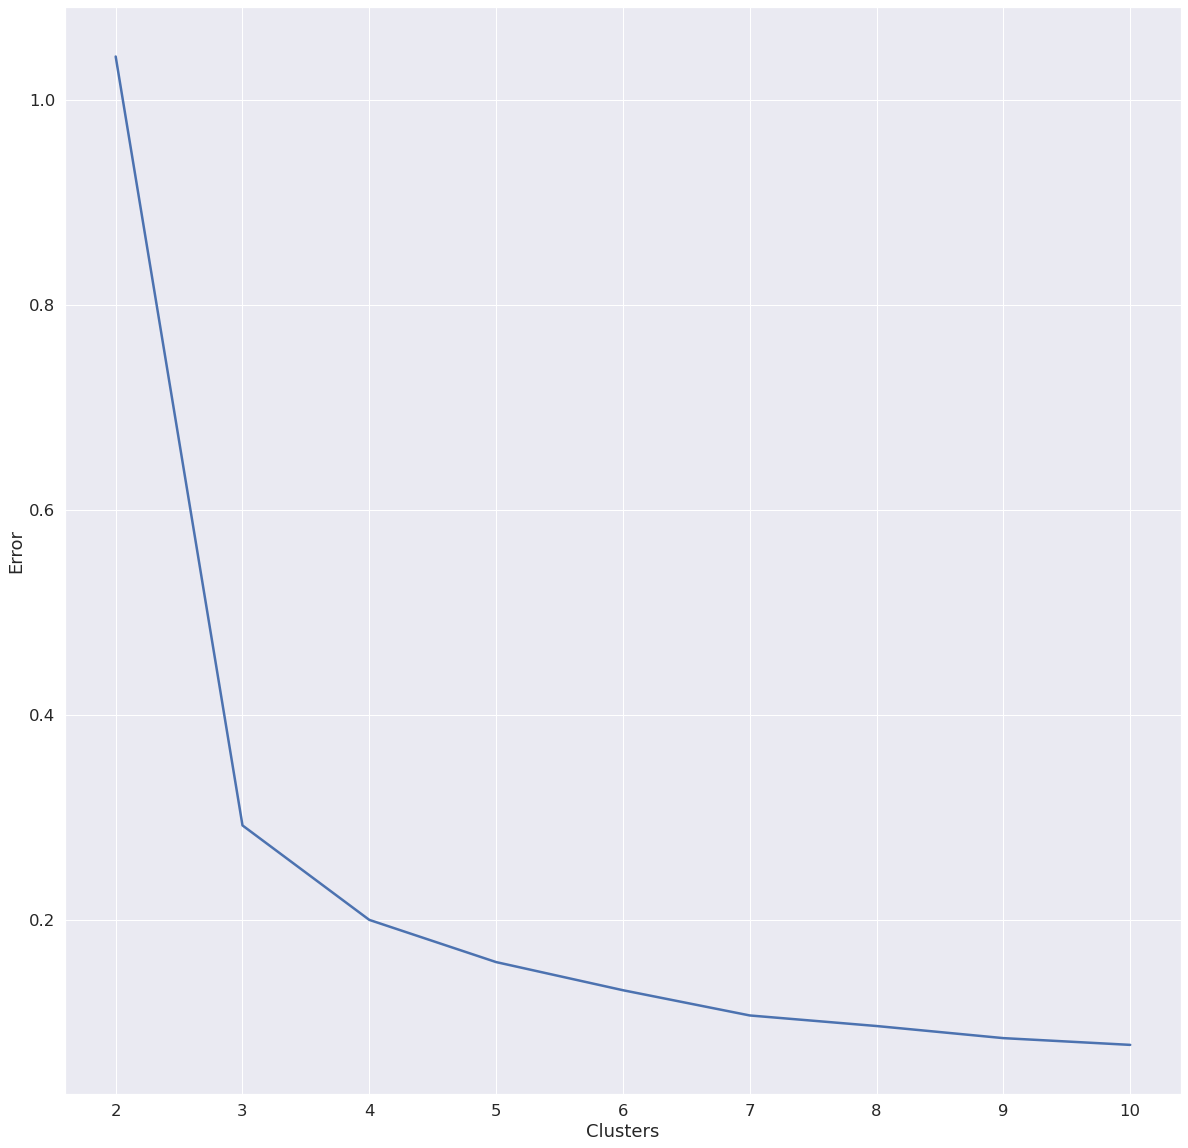

In [19]:
_ = _visualization.plot_cluster_errors(Ks,Js)

* It seems thare are too many columns, the number of clusters is almost the same of the number of samples

## Using a dendogram

We are using lastP as metric for the linkage method:

"The last p non-singleton formed in the linkage are the only non-leaf nodes in the linkage; they correspond to rows Z[n-p-2:end] in Z. All other non-singleton clusters are contracted into leaf nodes."

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html

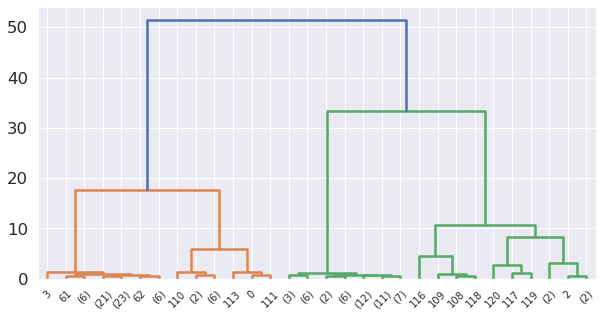

In [20]:
from importlib import reload
reload(_optimizer)
X_linked = _optimizer.linkage_cluster_dendogram(df_products_out)

In [21]:
clusters = _optimizer.fcluster_cut(df_products_out.values, max_d=2)
clusters.shape, len(np.unique(clusters))

((130,), 10)

In [22]:
df_products_out['hc_cluster'] = clusters

In [23]:
df_products_out[['kmeans_cluster', 'hc_cluster']].reset_index().groupby(['kmeans_cluster', 'hc_cluster']).count()

,,code
kmeans_cluster,hc_cluster,
0,1,59
1,6,1
2,2,9
3,3,3
4,5,3
5,9,2
6,10,3
7,4,47
8,8,1


/home/gorigan/anaconda3/envs/ml2/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

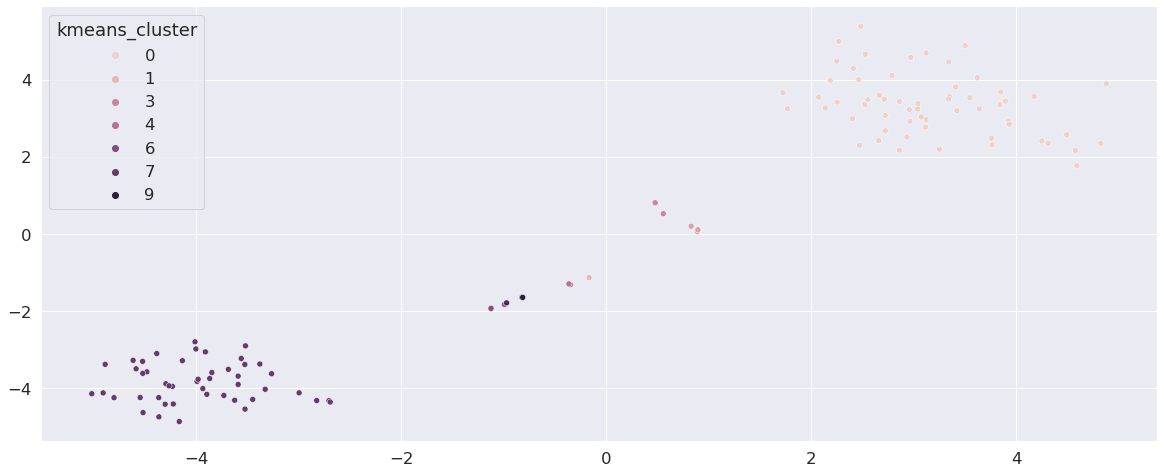

In [24]:
tsne_labels = _visualization.create_tsne_labels(df_products_out)
sns.scatterplot(tsne_labels[:,0], tsne_labels[:,1], hue=df_products_out['kmeans_cluster'])

/home/gorigan/anaconda3/envs/ml2/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

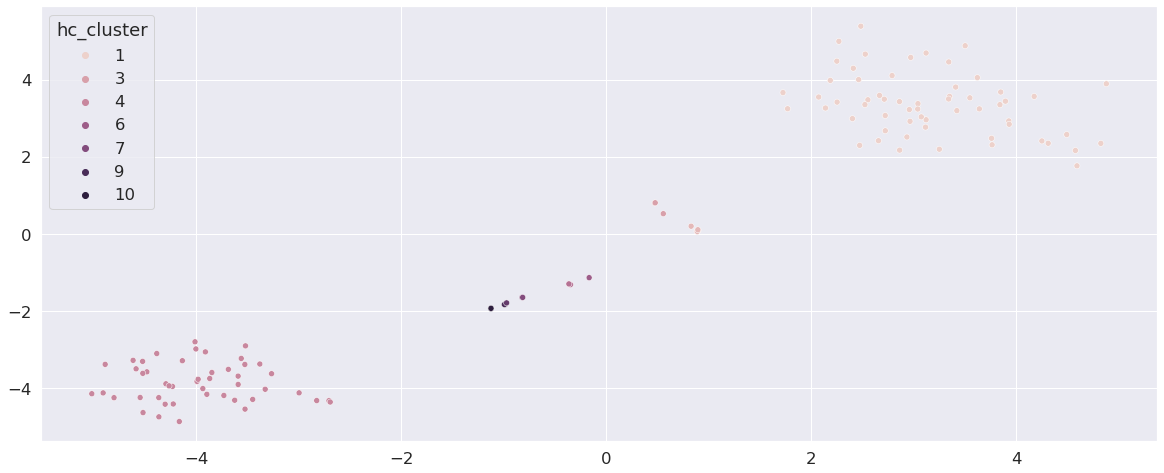

In [25]:
sns.scatterplot(tsne_labels[:,0], tsne_labels[:,1], hue=df_products_out['hc_cluster'])

In [26]:
_metrics.applyAllMetrics(df_products_out,df_products_out.kmeans_cluster)

Davies Bouldin
0.21016164705624277

Calinski and Harabaz
3616.8880769908774

Silhouette Score
0.8850541428846239



In [27]:
_metrics.applyAllMetrics(df_products_out,df_products_out.hc_cluster)

Davies Bouldin
0.2101616470562427

Calinski and Harabaz
3616.888076990877

Silhouette Score
0.8850541428846239



In [28]:
df_products_out.drop(columns=['hc_cluster', 'kmeans_cluster']).to_csv('../data/products_features_exp4.csv')